In [1]:
pip install prophet

  Using cached cmdstanpy-1.0.8-py3-none-any.whl (81 kB)
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt 
from prophet import Prophet
# Python
df = pd.read_csv('/Users/souvikpatra/Downloads/US_spotify_2019_jan - Sheet1.csv')
df

,sales_country_code,partner_report_date,streams
0,US,01/01/19,255662031
1,US,02/01/19,274983079
2,US,03/01/19,291956137
3,US,04/01/19,300374627
4,US,05/01/19,280467890
...,...,...,...
1091,US,27/12/21,377508236
1092,US,28/12/21,388725405
1093,US,29/12/21,394707862
1094,US,30/12/21,400973311


In [8]:
df['day'] =  df['partner_report_date'].apply(lambda x: str(x)[:-6])
df['Month'] = df['partner_report_date'].apply(lambda x: str(x)[-5:-3])
df['Year'] = df['partner_report_date'].apply(lambda x: str(x)[-2:])
df['ds'] = pd.DatetimeIndex(df['Month']+'-'+df['day']+'-'+df['Year'])
df

,sales_country_code,partner_report_date,streams,day,Month,Year,ds
0,US,01/01/19,255662031,01,01,19,2019-01-01
1,US,02/01/19,274983079,02,01,19,2019-01-02
2,US,03/01/19,291956137,03,01,19,2019-01-03
3,US,04/01/19,300374627,04,01,19,2019-01-04
4,US,05/01/19,280467890,05,01,19,2019-01-05
...,...,...,...,...,...,...,...
1091,US,27/12/21,377508236,27,12,21,2021-12-27
1092,US,28/12/21,388725405,28,12,21,2021-12-28
1093,US,29/12/21,394707862,29,12,21,2021-12-29
1094,US,30/12/21,400973311,30,12,21,2021-12-30


In [9]:
df.drop(['partner_report_date','day','Year', 'Month', 'sales_country_code'], axis=1, inplace=True)

In [10]:
df.rename(columns = {'streams':'y'}, inplace = True)

In [11]:
df

,y,ds
0,255662031,2019-01-01
1,274983079,2019-01-02
2,291956137,2019-01-03
3,300374627,2019-01-04
4,280467890,2019-01-05
...,...,...
1091,377508236,2021-12-27
1092,388725405,2021-12-28
1093,394707862,2021-12-29
1094,400973311,2021-12-30


In [12]:
m=Prophet(interval_width=1,growth='linear',seasonality_mode='multiplicative')

In [13]:
m.fit(df)

11:10:45 - cmdstanpy - INFO - Chain [1] start processing
11:10:46 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
future  = pd.read_csv('/Users/souvikpatra/Downloads/test_jan_2022_US - Sheet1.csv')
future 

,partner_report_date
0,01/01/22
1,02/01/22
2,03/01/22
3,04/01/22
4,05/01/22
5,06/01/22
6,07/01/22
7,08/01/22
8,09/01/22
9,10/01/22


In [25]:
future ['day'] =  future ['partner_report_date'].apply(lambda x: str(x)[:-6])
future ['Month'] = future ['partner_report_date'].apply(lambda x: str(x)[-5:-3])
future ['Year'] = future ['partner_report_date'].apply(lambda x: str(x)[-2:])
future ['ds'] = pd.DatetimeIndex(future ['Month']+'-'+future ['day']+'-'+future ['Year'])
future 

,partner_report_date,day,Month,Year,ds
0,01/01/22,01,01,22,2022-01-01
1,02/01/22,02,01,22,2022-01-02
2,03/01/22,03,01,22,2022-01-03
3,04/01/22,04,01,22,2022-01-04
4,05/01/22,05,01,22,2022-01-05
5,06/01/22,06,01,22,2022-01-06
6,07/01/22,07,01,22,2022-01-07
7,08/01/22,08,01,22,2022-01-08
8,09/01/22,09,01,22,2022-01-09
9,10/01/22,10,01,22,2022-01-10


In [26]:
future.drop(['partner_report_date','day','Year', 'Month'], axis=1, inplace=True)

In [27]:
future 

,ds
0,2022-01-01
1,2022-01-02
2,2022-01-03
3,2022-01-04
4,2022-01-05
5,2022-01-06
6,2022-01-07
7,2022-01-08
8,2022-01-09
9,2022-01-10


In [28]:
forecast = m.predict(future)

In [29]:
prediction=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

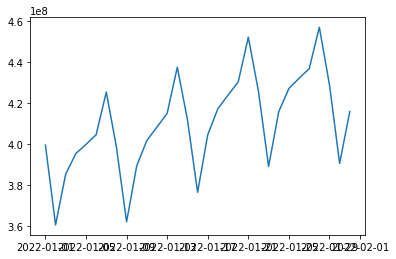

In [30]:
plt.plot(prediction.ds,prediction.yhat)

In [31]:
prediction

,ds,yhat,yhat_lower,yhat_upper
0,2022-01-01,3.993809e+08,3.541996e+08,4.378412e+08
1,2022-01-02,3.603787e+08,3.198113e+08,3.978754e+08
2,2022-01-03,3.852402e+08,3.452118e+08,4.273322e+08
3,2022-01-04,3.952886e+08,3.605143e+08,4.304427e+08
4,2022-01-05,3.997213e+08,3.590240e+08,4.337948e+08
5,2022-01-06,4.044585e+08,3.645415e+08,4.459576e+08
6,2022-01-07,4.252953e+08,3.797599e+08,4.648683e+08
7,2022-01-08,3.983727e+08,3.538326e+08,4.322619e+08
8,2022-01-09,3.618977e+08,3.167042e+08,4.014535e+08
9,2022-01-10,3.892702e+08,3.455635e+08,4.329405e+08


In [32]:
prediction.to_csv('/Users/souvikpatra/Downloads/test_jan_2022_US.csv')